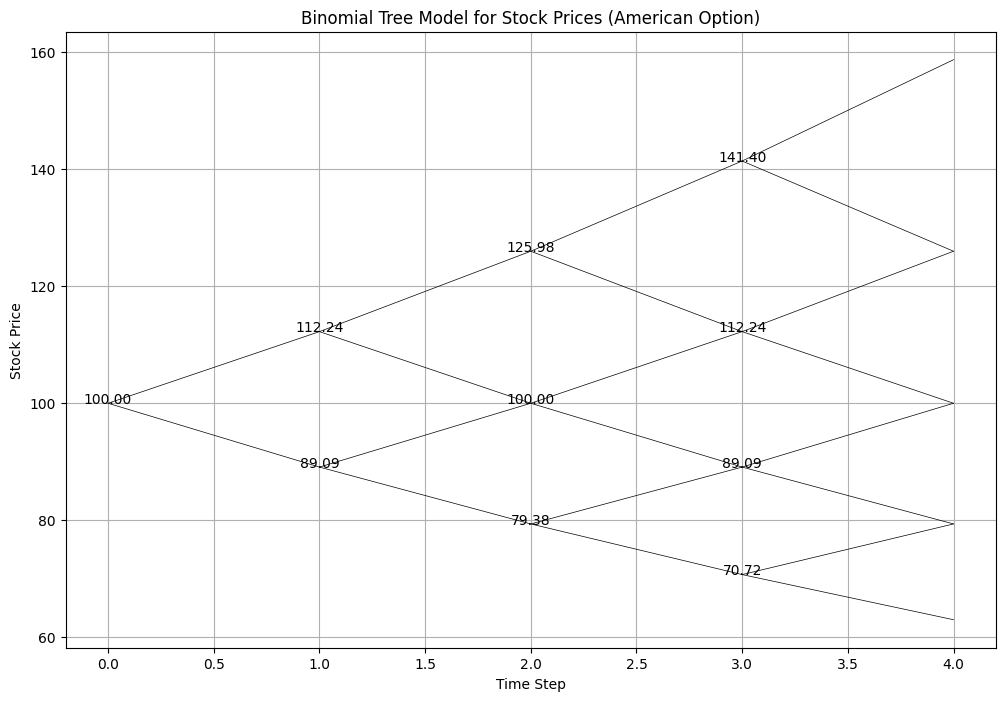

미국형 콜 옵션 가격: 11.043871091951113


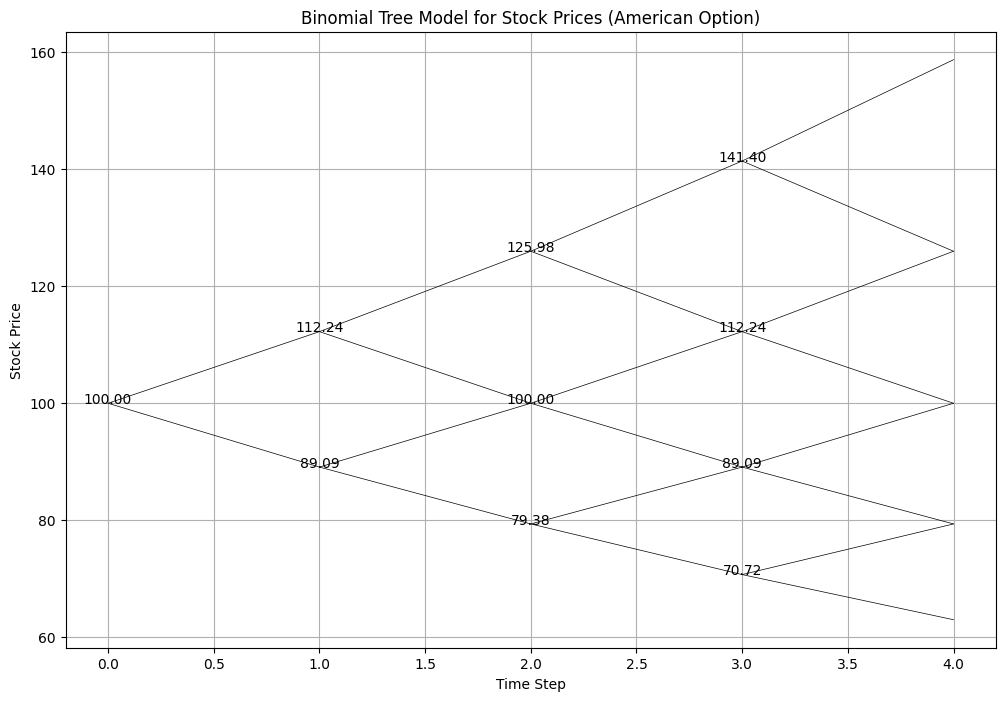

미국형 풋 옵션 가격: 6.499559886616256


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_tree_model_american(S0, K, T, r, sigma, N, option_type="call"):
    """
    Binomial Tree 모델을 사용하여 미국형 옵션 가격을 계산하는 함수 및 시각화

    Parameters:
    S0: 초기 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간
    r: 무위험 이자율
    sigma: 주식 가격의 변동성
    N: 시간 단계의 수
    option_type: "call" 또는 "put"

    Returns:
    옵션의 현재 가격
    """
    # 시간 단계 크기
    dt = T / N
    # 상승 비율과 하락 비율
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    # 위험 중립 확률
    p = (np.exp(r * dt) - d) / (u - d)

    # 주식 가격 트리 생성
    stock_prices = np.zeros((N + 1, N + 1))
    stock_prices[0, 0] = S0
    for i in range(1, N + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # 마지막 단계의 옵션 가치 계산
    option_values = np.zeros((N + 1, N + 1))
    if option_type == "call":
        option_values[:, N] = np.maximum(0, stock_prices[:, N] - K)
    else:
        option_values[:, N] = np.maximum(0, K - stock_prices[:, N])

    # 이전 단계로 돌아가면서 옵션 가치 계산
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            continuation_value = np.exp(-r * dt) * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])
            if option_type == "call":
                exercise_value = np.maximum(0, stock_prices[j, i] - K)
            else:
                exercise_value = np.maximum(0, K - stock_prices[j, i])
            option_values[j, i] = np.maximum(continuation_value, exercise_value)

    # 시각화
    plt.figure(figsize=(12, 8))
    for i in range(N + 1):
        for j in range(i + 1):
            plt.text(i, stock_prices[j, i], f'{stock_prices[j, i]:.2f}', fontsize=10, ha='center')
            plt.plot([i, i+1], [stock_prices[j, i], stock_prices[j, i] * u], 'k-', lw=0.5)
            plt.plot([i, i+1], [stock_prices[j, i], stock_prices[j, i] * d], 'k-', lw=0.5)

    plt.title('Binomial Tree Model for Stock Prices (American Option)')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

    return option_values[0, 0]

# 예제 파라미터
S0 = 100  # 초기 주식 가격
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
N = 3  # 시간 단계 수

# 미국형 콜 옵션 가격 계산 및 시각화
call_option_price = binomial_tree_model_american(S0, K, T, r, sigma, N, option_type="call")
print(f"미국형 콜 옵션 가격: {call_option_price}")

# 미국형 풋 옵션 가격 계산 및 시각화
put_option_price = binomial_tree_model_american(S0, K, T, r, sigma, N, option_type="put")
print(f"미국형 풋 옵션 가격: {put_option_price}")
